In [1]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## Helper functions for plotting

In [2]:
def plot_pmf(ax, items, nbins=10, alpha=0.5, c=None):
    bins = np.linspace(np.min(items), np.max(items)+1, nbins+1)
    if(np.max(items) <= 1):
        bins = np.linspace(np.min(items), np.max(items)+.001, nbins+1)
    counts, _ = np.histogram(items, bins)
    width = (bins[1]-bins[0])*0.8
    if c is not None:
        ax.bar(bins[:-1], counts/items.shape[0], width=width,
               align='edge',alpha=alpha, color=c)
    else:
        ax.bar(bins[:-1], counts/items.shape[0], width=width,
               align='edge',alpha=alpha)
    
def plot_initial(sample, population, title=None, c=None, compare_keep=True):
    fig, axs = plt.subplots(1,2, figsize=(7.5,3))
    plot_pmf(axs[0], sample, alpha=1.0, c=c)
    axs[0].set_ylabel('Sample PMF (count/sample_size)')
    axs[0].set_title('Sample distribution')
    axs[0].axvline(np.mean(sample), label='sample', color='red')
    if compare_keep: axs[0].axvline(np.mean(population), color='orange')
    plot_pmf(axs[1], population, alpha=1.0, c=c)
    axs[1].set_ylabel('Population PMF (count/9999)')
    axs[1].set_title('Population distribution')
    axs[1].axvline(np.mean(population), label='population', color='orange')
    if compare_keep: axs[1].axvline(np.mean(sample), color='red')
    fig.legend(loc='lower right')
    fig.tight_layout()
    if title is not None:
        fig.suptitle(title)
    plt.show()
    
def plot_sample_mean_distribution(population, sample,
                                  sample_size, num_samples=10000):
    fig = plt.figure()
    ax = plt.gca()
    sample_stats = []
    for i in range(num_samples):
        resample = np.random.choice(population,size=sample_size, replace=True)
        sample_stats.append(np.mean(resample))
    plot_pmf(ax, np.array(sample_stats))
    ax.set_title('Sample mean distribution')
    ax.set_xlabel('PMF')
    ax.set_ylabel('Sample means')
    ax.axvline(np.mean(sample), label='sample', color='red')
    ax.axvline(np.mean(population), label='population', color='orange')
    ax.legend(loc='upper right')
    return sample_stats

## Functions to generate populations

In [3]:
# some random variables
from scipy.stats import uniform
def uniform_rv(a, b):
    return lambda n: uniform.rvs(a, b, size=n)

def multinomial_rv(ub):
    return lambda n: np.random.randint(1, ub+1, size=n)

from scipy.stats import expon
def exp_rv(lam):
    return lambda n: expon.rvs(lam,size=n).astype(int)

from scipy.stats import beta
def beta_rv(a, b):
    return lambda n: beta.rvs(a, b, size=n)

In [4]:
def get_population(rv_maker, population_size):
    population = rv_maker(population_size)
    return population

def get_sample(population, sample_size):
    return np.random.choice(population, size=sample_size, replace=True)

# Sample statistic distribution vs. Population distribution
* Population mean: \\( \mu \\), population variance: \\( \sigma^2 \\)
* Sample mean: \\(\bar{X} \\) = ```np.mean(sample)```, where \\( E[\bar{X}] = \mu \\)
* Sample variance: \\( S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2 \\), where \\( E[S^2] = \sigma^2 \\)

## A single sample vs population

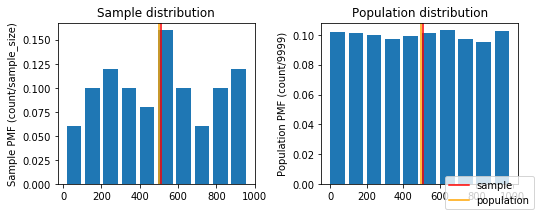

sample mean 510.3 sample variance 74875.9693877551
population mean 498.66206620662064 population variance 83761.48946111734


In [6]:
# Multinomial distribution
population = get_population(multinomial_rv(1000), 9999)
sample_size = 50
sample = get_sample(population, sample_size)
plot_initial(sample, population)

sample_variance = np.sum((sample - np.mean(sample))**2)/(sample_size-1)
print('sample mean', np.mean(sample), 'sample variance', sample_variance)
print('population mean', np.mean(population),
      'population variance', np.var(population))

## Distribution of many sample means

Standard error (SE) is deviation of original sample's mean from actual population mean \\( SE = \sqrt{\frac{S^2}{n}} = \frac{S}{\sqrt{n}} \\)

standard error of original sample	 1497.5193877551021
real variance of sample mean		 1669.063907199196

average of all sample means		 498.81229800000006
	is approx. population mean	 498.66206620662064


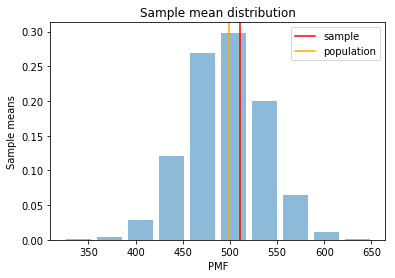

In [8]:
sample_means = plot_sample_mean_distribution(population, sample,
                                             sample_size=sample_size, num_samples=10000)
print('standard error of original sample\t', sample_variance/50)
print('real variance of sample mean\t\t', np.var(sample_means))
print()
print('average of all sample means\t\t', np.mean(sample_means))
print('\tis approx. population mean\t', np.mean(population))